# Part 2 NLP (25 pts)

The Part 2 is an in-class competition. 

Original Competition: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge 

Using the file: jigsaw-toxic-comment-classification-challenge.zip

The .zip file contains the Jigsaw Toxic Comment Classification dataset as provided in the original Kaggle competition. 
Data is organized as zip files containing .csv files. The training data is organized by ID, text, and label.


Content Warning: The dataset contains text that may be considered profane, vulgar, or offensive.


Submission Details: part2.ipynb file (Write your comments as markdown) Model and results (10 pts) + class ranking (10 pts) + report (5 pts)

review -

https://colab.research.google.com/github/kwanhong66/PyTorchKaggle/blob/master/Toxic_comment_classification_bert_simple.ipynb#scrollTo=y-G3zxj8zgVM

refernce - 
https://towardsdatascience.com/toxic-comment-classification-using-lstm-and-lstm-cnn-db945d6b7986

https://github.com/shaunak09vb/Toxic-Comment-Classifier-AWS/blob/main/source

# Step 1. Load the dataset

In [1]:
# !pip install cleantext

In [39]:
import pandas as pd
import torch

pd.set_option('display.max_colwidth', None)

In [142]:
# ! rm -rf jigsaw-toxic-comment-classification-challenge
# ! rm -rf __MACOSX
# ! wget  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
# ! unzip jigsaw-toxic-comment-classification-challenge.zip

# ! mkdir model
# ! rm -rf wiki-news-300d-1M.vec.zip
# ! wget  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
# ! unzip wiki-news-300d-1M.vec.zip
# ! mv wiki-news-300d-1M.vec model/
# ! rm -rf wiki-news-300d-1M.vec.zip
# ! rm -rf patterns.pkl
# ! wget https://github.com/anjali-ojha/deep-learning/raw/lab2/lab-2/part-2/patterns.pkl


python(7829) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(7830) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


--2024-05-06 22:41:55--  https://github.com/anjali-ojha/deep-learning/raw/lab2/lab-2/part-2/patterns.pkl
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/anjali-ojha/deep-learning/lab2/lab-2/part-2/patterns.pkl [following]
--2024-05-06 22:41:55--  https://raw.githubusercontent.com/anjali-ojha/deep-learning/lab2/lab-2/part-2/patterns.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2124 (2.1K) [application/octet-stream]
Saving to: ‘patterns.pkl’

patterns.pkl        100%[===================>]   2.07K  --.-KB/s    in 0.001s  

2024-05-06 22:41:55 (3.34 MB/s) - ‘patterns.pkl’ save

## Configurations

In [155]:
DEVICE = "cuda" if torch.cuda.is_available() else "mps"
embedding_file = 'model/wiki-news-300d-1M.vec'
DETECTION_CLASSES = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'neutral']

## Data Loading

In [41]:
base_path = "jigsaw-toxic-comment-classification-challenge"
train_df = pd.read_csv(f'{base_path}/train.csv')

print(f"{train_df.shape = } \n")
train_df.head()

train_df.shape = (159571, 8) 



,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


In [42]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



# Step 2. Preprocess the data as you see fit


In [147]:
import re
import spacy
import nltk
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import string
from string import ascii_lowercase
import matplotlib.pyplot as plt


from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')



{'toxic': 15294, 'severe_toxic': 1595, 'obscene': 8449, 'threat': 478, 'insult': 7877, 'identity_hate': 1405, 'neutral': 143346}


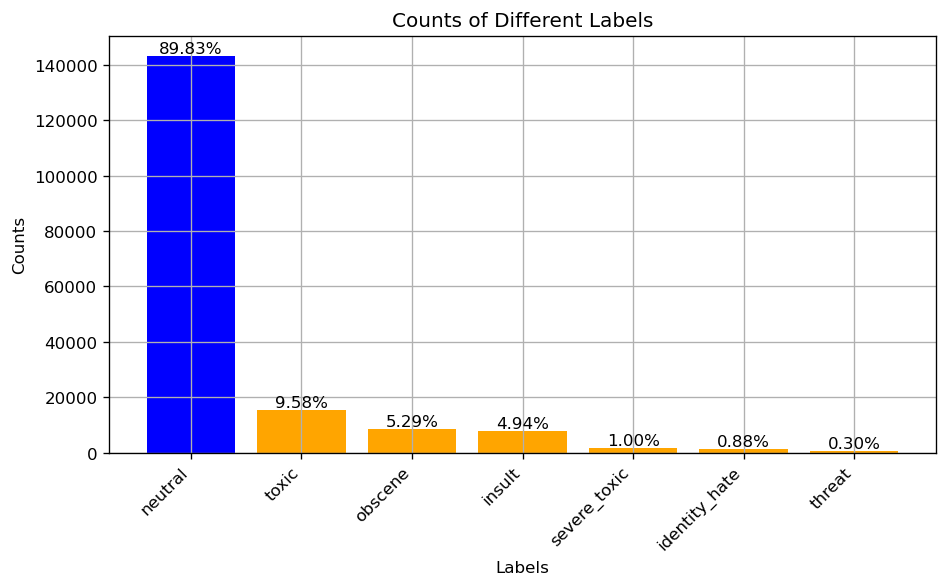

In [45]:
# Count record counts for each label
label_counts = train_df.iloc[:, 2:].sum().to_dict()
label_counts['neutral'] = len(train_df[(train_df.iloc[:, 2:] == 0).all(axis=1)])
print(label_counts)

sorted_label_counts = dict(sorted(label_counts.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(8, 5), dpi=120)
bars = plt.bar(sorted_label_counts.keys(), sorted_label_counts.values(), color=['blue' if label == 'neutral' else 'orange' for label in sorted_label_counts.keys()])

plt.xlabel('Labels')
plt.ylabel('Counts')
plt.grid(True)
plt.title('Counts of Different Labels')

# Add percentages on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{yval/len(train_df)*100:3.2f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [60]:
# Sample data with emojis and contractions
messages = [
    "Hellllllllo! 😊 How's it going? I can't wait for tomorrow's party! 🎉",
    "I'm feeling awesome today! Can't believe it's already Friday! 🚀",
    "they'd gone forever and I hate this",
    "I've got a lot of work to do this weekend. 😅",
"Hey man, I can't not trying to edit war.",
"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)"
]

sample_df = pd.DataFrame({'comment_text': messages})
sample_df

,comment_text
0,Hellllllllo! 😊 How's it going? I can't wait for tomorrow's party! 🎉
1,I'm feeling awesome today! Can't believe it's already Friday! 🚀
2,they'd gone forever and I hate this
3,I've got a lot of work to do this weekend. 😅
4,"Hey man, I can't not trying to edit war."
5,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)"


In [65]:
import contractions

def remove_contraction(text):
    """ This function remove contractions from the  string"""
    try:
        specials = ["’", "‘", "´", "`"]
        for s in specials:
            text = text.replace(s, "'")
        expanded_words = [] 
        for word in text.split():
            try:
                expanded_words.append(contractions.fix(word)) 
            except Exception as e:
                expanded_words.append(word)

        return ' '.join(expanded_words)
    except Exception as e:
        print(f"Error occurred during remove_contraction: {e}")
        print(f"{text = }")
        raise e

sample_df["wo_contractions"] =  sample_df['comment_text'].apply(remove_contraction)
sample_df[["comment_text", "wo_contractions"]]

,comment_text,wo_contractions
0,Hellllllllo! 😊 How's it going? I can't wait for tomorrow's party! 🎉,Hellllllllo! 😊 How's it going? I cannot wait for tomorrow's party! 🎉
1,I'm feeling awesome today! Can't believe it's already Friday! 🚀,I am feeling awesome today! Can't believe it is already Friday! 🚀
2,they'd gone forever and I hate this,they would gone forever and I hate this
3,I've got a lot of work to do this weekend. 😅,I have got a lot of work to do this weekend. 😅
4,"Hey man, I can't not trying to edit war.","Hey man, I cannot not trying to edit war."
5,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)","D'aww! He matches this background colour I am seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)"


In [75]:
def remove_emojis_and_unicode(text):
    """ This function will remove the emoji and special characters from the string """
    emoji_pattern = re.compile("["
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  
                               u"\u3030"
                               u"\u0300-\u036f"          # combining diacritic marks
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               "]+", flags=re.UNICODE)
    
    cleaned_text = emoji_pattern.sub(r'', text)
    return cleaned_text


sample_df["wo_special"] =  sample_df['wo_contractions'].apply(remove_emojis_and_unicode)
sample_df[["comment_text", "wo_contractions", "wo_special"]]

,comment_text,wo_contractions,wo_special
0,Hellllllllo! 😊 How's it going? I can't wait for tomorrow's party! 🎉,Hellllllllo! 😊 How's it going? I cannot wait for tomorrow's party! 🎉,Hellllllllo! How's it going? I cannot wait for tomorrow's party!
1,I'm feeling awesome today! Can't believe it's already Friday! 🚀,I am feeling awesome today! Can't believe it is already Friday! 🚀,I am feeling awesome today! Can't believe it is already Friday!
2,they'd gone forever and I hate this,they would gone forever and I hate this,they would gone forever and I hate this
3,I've got a lot of work to do this weekend. 😅,I have got a lot of work to do this weekend. 😅,I have got a lot of work to do this weekend.
4,"Hey man, I can't not trying to edit war.","Hey man, I cannot not trying to edit war.","Hey man, I cannot not trying to edit war."
5,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)","D'aww! He matches this background colour I am seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)","D'aww! He matches this background colour I am seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)"


In [146]:
import pickle

repeated_patterns = None
with open('patterns.pkl', 'rb') as f:
    repeated_patterns = pickle.load(f)
        
        
def clean_repeat_patterns_lower(text,remove_repeat_text=True, remove_patterns_text=True, is_lower=True):
    """ This method will remove the """
    if is_lower:
        text=text.lower()

    if remove_patterns_text:
        for target, patterns in repeated_patterns.items():
            for pat in patterns:
                text=str(text).replace(pat, target)

    if remove_repeat_text:
        text = re.sub(r'(.)\1{2,}', r'\1', text) 

    text = str(text).replace("\n", " ")
    text = re.sub(r'[^\w\s]',' ',text)
    text = re.sub('[0-9]',"",text)
    text = re.sub(" +", " ", text)
    text = re.sub("([^\x00-\x7F])+"," ",text)
    return text 


sample_df["wo_repeat"] =  sample_df['wo_contractions'].apply(clean_repeat_patterns_lower)
sample_df[["comment_text", "wo_contractions", "wo_repeat"]]

,comment_text,wo_contractions,wo_repeat
0,Hellllllllo! 😊 How's it going? I can't wait for tomorrow's party! 🎉,Hellllllllo! 😊 How's it going? I cannot wait for tomorrow's party! 🎉,helo how s it going i cannot wait for tomorrow s party
1,I'm feeling awesome today! Can't believe it's already Friday! 🚀,I am feeling awesome today! Can't believe it is already Friday! 🚀,i am feeling awesome today can t believe it is already friday
2,they'd gone forever and I hate this,they would gone forever and I hate this,they would gone forever and i hate this
3,I've got a lot of work to do this weekend. 😅,I have got a lot of work to do this weekend. 😅,i have got a lot of work to do this weekend
4,"Hey man, I can't not trying to edit war.","Hey man, I cannot not trying to edit war.",hey man i cannot not trying to edit war
5,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)","D'aww! He matches this background colour I am seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",d aww he matches this background colour i am seemingly stuck with thanks talk january utc


In [77]:
def prepare_stopwords_list():
    stopword_list = STOP_WORDS
    potential_stopwords = ['editor', 'reference', 'thank', 'work','find', 'good', 'know', 'like', 
                           'look', 'thing', 'want', 'time', 'list', 'section','wikipedia', 'doe', 
                           'add','new', 'try', 'think', 'write','use', 'user', 'way', 'page']
    for word in potential_stopwords:
        stopword_list.add(word)
    return(stopword_list)


def remove_stop_words(text, remove_stop=True):
    stop_words=prepare_stopwords_list()
    output = ""
    if remove_stop:
        text=text.split(" ")
        for word in text:
            if word not in stop_words:
                output=output + " " + word
    else :
        output=text  
    return str(output.strip()) 

sample_df["wo_stopwords"] =  sample_df['wo_repeat'].apply(remove_stop_words)
sample_df[["comment_text", "wo_contractions", "wo_repeat", "wo_stopwords"]]

,comment_text,wo_contractions,wo_repeat,wo_stopwords
0,Hellllllllo! 😊 How's it going? I can't wait for tomorrow's party! 🎉,Hellllllllo! 😊 How's it going? I cannot wait for tomorrow's party! 🎉,helo how s it going i cannot wait for tomorrow s party,helo s going wait tomorrow s party
1,I'm feeling awesome today! Can't believe it's already Friday! 🚀,I am feeling awesome today! Can't believe it is already Friday! 🚀,i am feeling awesome today can t believe it is already friday,feeling awesome today t believe friday
2,they'd gone forever and I hate this,they would gone forever and I hate this,they would gone forever and i hate this,gone forever hate
3,I've got a lot of work to do this weekend. 😅,I have got a lot of work to do this weekend. 😅,i have got a lot of work to do this weekend,got lot weekend
4,"Hey man, I can't not trying to edit war.","Hey man, I cannot not trying to edit war.",hey man i cannot not trying to edit war,hey man trying edit war
5,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)","D'aww! He matches this background colour I am seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",d aww he matches this background colour i am seemingly stuck with thanks talk january utc,d aww matches background colour seemingly stuck thanks talk january utc


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm') # Load the English language model

def lemmatize(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text


In [152]:
import spacy

nlp = spacy.load('en_core_web_sm') # Load the English language model

def lemmatize(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text


sample_df["w_lemma"] =  sample_df['wo_stopwords'].apply(lemmatize)
sample_df[["comment_text", "wo_contractions", "wo_repeat", "wo_stopwords", "w_lemma"]]

,comment_text,wo_contractions,wo_repeat,wo_stopwords,w_lemma
0,Hellllllllo! 😊 How's it going? I can't wait for tomorrow's party! 🎉,Hellllllllo! 😊 How's it going? I cannot wait for tomorrow's party! 🎉,helo how s it going i cannot wait for tomorrow s party,helo s going wait tomorrow s party,helo s go wait tomorrow s party
1,I'm feeling awesome today! Can't believe it's already Friday! 🚀,I am feeling awesome today! Can't believe it is already Friday! 🚀,i am feeling awesome today can t believe it is already friday,feeling awesome today t believe friday,feel awesome today t believe friday
2,they'd gone forever and I hate this,they would gone forever and I hate this,they would gone forever and i hate this,gone forever hate,go forever hate
3,I've got a lot of work to do this weekend. 😅,I have got a lot of work to do this weekend. 😅,i have got a lot of work to do this weekend,got lot weekend,get lot weekend
4,"Hey man, I can't not trying to edit war.","Hey man, I cannot not trying to edit war.",hey man i cannot not trying to edit war,hey man trying edit war,hey man try edit war
5,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)","D'aww! He matches this background colour I am seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",d aww he matches this background colour i am seemingly stuck with thanks talk january utc,d aww matches background colour seemingly stuck thanks talk january utc,d aww match background colour seemingly stuck thank talk january utc


In [153]:
def clean_text(text):
    text=remove_contraction(text)
    text=clean_repeat_patterns_lower(text)
    text=remove_emojis_and_unicode(text)
    text=remove_stop_words(text)
    text=lemmatize(text)
    return text


def clean_text_column(text_column):
    return text_column.apply(lambda x: clean_text(x))

sample_df["cleaned"] =  clean_text_column(sample_df["comment_text"])
sample_df[["comment_text", "cleaned"]]

,comment_text,cleaned
0,Hellllllllo! 😊 How's it going? I can't wait for tomorrow's party! 🎉,helo s go wait tomorrow s party
1,I'm feeling awesome today! Can't believe it's already Friday! 🚀,feel awesome today t believe friday
2,they'd gone forever and I hate this,go forever hate
3,I've got a lot of work to do this weekend. 😅,get lot weekend
4,"Hey man, I can't not trying to edit war.",hey man try edit war
5,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",d aww match background colour seemingly stuck thank talk january utc


In [18]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

class DataProcessing:
    def __init__(self, embedding_file, DETECTION_CLASSES,
                 max_vocab_size=100000, max_seq_length=100, embedding_dimension=300):
        self.max_vocab_size = max_vocab_size
        self.max_seq_length = max_seq_length
        self.embedding_dimension = embedding_dimension
        self.embedding_file = embedding_file
        self.tokenizer = Tokenizer(num_words=self.max_vocab_size)
        self.word_index = None
        self.embedding_layer = None

    def fit_tokenizer(self, data):
        data['comment_text'] = clean_text_column(data['comment_text'])
        self.tokenizer.fit_on_texts(data['comment_text'].values)
        self.word_index = self.tokenizer.word_index
        list_tokenized_train = self.tokenizer.texts_to_sequences(data['comment_text'].values)
        X_t = pad_sequences(list_tokenized_train, maxlen=self.max_seq_length, padding='post')
        return X_t
        
    def get_tokenizer(self):
        return self.tokenizer

    def get_embedding_layer(self):
        # Load pre-trained embeddings from the wiki-news-300d-1M.vec
        embeddings_index_fasttext = {}
        with open(self.embedding_file, encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                embeddings_index_fasttext[word] = np.asarray(values[1:], dtype='float32')

        embedding_matrix_fasttext = np.random.random((len(self.word_index) + 1, self.embedding_dimension))
        for word, i in self.word_index.items():
            embedding_vector = embeddings_index_fasttext.get(word)
            if embedding_vector is not None:
                embedding_matrix_fasttext[i] = embedding_vector

        self.embedding_layer = nn.Embedding(len(self.word_index) + 1, self.embedding_dimension)
        self.embedding_layer.weight = nn.Parameter(torch.Tensor(embedding_matrix_fasttext))
        return self.embedding_layer
    
    

    def tokenize(self, data):
        data['comment_text'] = clean_text_column(data['comment_text'])
        list_tokenized = self.tokenizer.texts_to_sequences(data['comment_text'].values)
        X_t = pad_sequences(list_tokenized, maxlen=self.max_seq_length, padding='post')
        return X_t
    
    
    def tokenize_string(self, text):
        text = clean_text(text)
        list_tokenized = self.tokenizer.texts_to_sequences([text])
        X_t = pad_sequences(list_tokenized, maxlen=self.max_seq_length, padding='post')
        return X_t


In [19]:
BATCH_SIZE = 32

def get_train_test_data(X_t, train_df, val_split=0.2):
    
    data_tensor = torch.tensor(X_t, dtype=torch.long).to(DEVICE)
    target_tensor = torch.tensor(train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values, 
                                 dtype=torch.float)

    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(data_tensor, target_tensor, test_size=val_split)
    
    
    print(f"Train Size = {X_train.shape}, Val Size = {X_val.shape}")
    # Create DataLoader for training and validation sets
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_dataset = TensorDataset(X_val, y_val)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
    return train_loader, val_loader


In [ ]:
def load_test_data():
    df1 = pd.read_csv(f'{base_path}/test.csv')
    df2 = pd.read_csv(f'{base_path}/test_labels.csv')
    df_test = pd.merge(df1, df2, on='id', how='inner')
    
    df_test = df_test.loc[df_test['toxic'] >= 0] # removing sample with labels equal to -1
    df_test.reset_index(inplace=True)
    df_test = df_test.drop(columns=['index'])
    print("test shape = ", df_test.shape)
    return df_test



df_test = load_test_data()
processor = DataProcessing(embedding_file, DETECTION_CLASSES)
X_test = processor.tokenize(df_test)


# Convert data to PyTorch tensors
test_data_tensor = torch.tensor(X_test, dtype=torch.long)
test_target_tensor = torch.tensor(df_test[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values, dtype=torch.float)

test_dataset = TensorDataset(test_data_tensor, test_target_tensor)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)


test shape =  (63978, 8)


# Step 3. Utilize a model implementing a Natural Language Processing strategy


In [27]:
class LSTMModel(nn.Module):
    
    def __init__(self, embedding_layer, num_classes, hidden_size=40, dropout=0.1):
        super(LSTMModel, self).__init__()
        self.embedding_layer = embedding_layer
        self.lstm = nn.LSTM(embedding_layer.embedding_dim, hidden_size, batch_first=True)
        self.global_max_pooling = nn.AdaptiveMaxPool1d(1)
        self.dropout1 = nn.Dropout(dropout)
        self.dense1 = nn.Linear(hidden_size, 30)
        self.relu = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)
        self.dense2 = nn.Linear(30, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded_sequences = self.embedding_layer(x)
        lstm_output, _ = self.lstm(embedded_sequences)
        global_max_pooled = self.global_max_pooling(lstm_output.permute(0, 2, 1))
        x = self.dropout1(global_max_pooled.squeeze(2))
        x = self.relu(self.dense1(x))
        x = self.dropout2(x)
        x = self.dense2(x)
        return self.sigmoid(x)
    

# Step 4. Train your model.


In [28]:
def plot_training_metrics(training_metric):
    num_epochs = len(training_metric['train_loss'])
    epochs = np.arange(1, num_epochs + 1)  # Assuming start from 1, adjust if needed

    # Plotting side by side without epoch axis
    fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=100)

    # Plot g_loss
    axs[0].plot(epochs, training_metric['train_loss'], marker='o')
    axs[0].set_title('train loss')
    axs[0].set_xlabel('Epochs')
    axs[0].grid(True)

    axs[1].plot(epochs, training_metric['val_loss'], marker='o')
    axs[1].set_title('val loss')
    axs[1].set_xlabel('Epochs')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


In [29]:
from tqdm import tqdm  # Import tqdm for progress tracking
import torch.optim as optim



def train(train_loader, val_loader, model, criterion, optimizer, num_epochs):
    
    print("Started training")
    training_metrics = {"train_loss": [], "val_loss": []}
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(train_loader):
            inputs = inputs.to(DEVICE)
            labels = labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation loop
        model.eval()
        val_loss = 0.0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(DEVICE)
                labels = labels.to(DEVICE)
                outputs = model(inputs)
                val_loss += criterion(outputs, labels).item()

        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}, Val Loss: {val_loss / len(val_loader):.4f}')
        
        training_metrics["train_loss"].append(running_loss / len(train_loader))
        training_metrics["val_loss"].append(val_loss / len(val_loader))

    plot_training_metrics(training_metrics)    
    return training_metrics, model

In [30]:
processor = DataProcessing(embedding_file, DETECTION_CLASSES)
X_t = processor.fit_tokenizer(train_df)
print("Processed Data Tokens")

Processed Data Tokens


Train Size = torch.Size([127656, 100]), Val Size = torch.Size([31915, 100])
Started training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3990/3990 [04:00<00:00, 16.57it/s]


Epoch 1/10, Loss: 0.0612, Val Loss: 0.0489


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3990/3990 [03:48<00:00, 17.45it/s]


Epoch 2/10, Loss: 0.0433, Val Loss: 0.0487


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3990/3990 [03:41<00:00, 18.05it/s]


Epoch 3/10, Loss: 0.0359, Val Loss: 0.0505


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3990/3990 [03:37<00:00, 18.35it/s]


Epoch 4/10, Loss: 0.0306, Val Loss: 0.0561


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3990/3990 [03:31<00:00, 18.85it/s]


Epoch 5/10, Loss: 0.0266, Val Loss: 0.0607


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3990/3990 [03:28<00:00, 19.10it/s]


Epoch 6/10, Loss: 0.0235, Val Loss: 0.0701


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3990/3990 [03:24<00:00, 19.49it/s]


Epoch 7/10, Loss: 0.0206, Val Loss: 0.0762


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3990/3990 [03:26<00:00, 19.36it/s]


Epoch 8/10, Loss: 0.0186, Val Loss: 0.0796


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3990/3990 [03:26<00:00, 19.34it/s]


Epoch 9/10, Loss: 0.0164, Val Loss: 0.0857


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3990/3990 [03:29<00:00, 19.01it/s]


Epoch 10/10, Loss: 0.0148, Val Loss: 0.0898


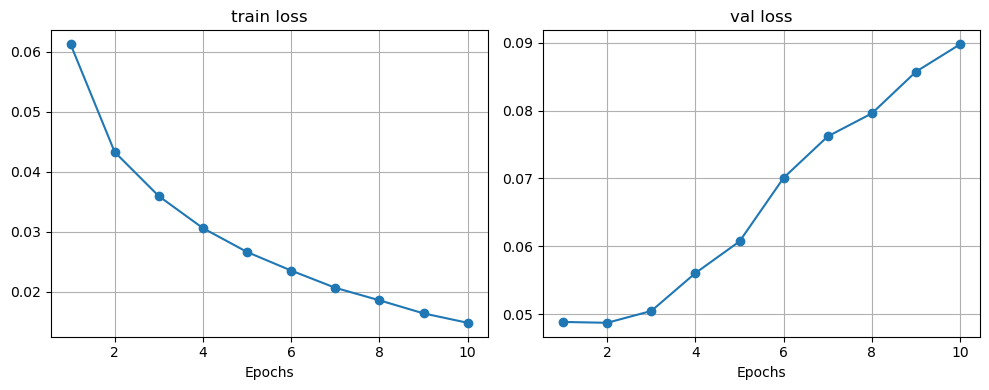

In [32]:

train_loader, val_loader = get_train_test_data(X_t, train_df)
embedding_layer = processor.get_embedding_layer()
model = LSTMModel(embedding_layer, num_classes=6).to(DEVICE)


training_metrics, model = train(train_loader, val_loader, 
                                        model, criterion = nn.BCELoss(), 
                                        optimizer = optim.Adam(model.parameters()), 
                                        num_epochs = 10)

# Step 5. Display the results of your model on the Test dataset by showing the predicted labels against their true labels

In [135]:
def get_decision_boundary(y_true, y_pred_probs, plot=False):
    num_classes = y_true.shape[1]  # Assuming 6 classes

    label_distribution = np.mean(y_true, axis=0)  # Calculate mean across rows to get label distribution
    normalized_probs = (y_pred_probs - np.min(y_pred_probs, axis=0)) / (np.max(y_pred_probs, axis=0) - np.min(y_pred_probs, axis=0))

    decision_boundaries = []

    # Calculate decision boundary for each class using a percentile-based strategy
    for i in range(num_classes):
        percentile_threshold = np.percentile(normalized_probs[:, i], (1 - label_distribution[i]) * 100.0)
        decision_boundaries.append(percentile_threshold)

    # Print decision boundaries for each class
    for i, boundary in enumerate(decision_boundaries):
        print(f'Decision Boundary for Label {DETECTION_CLASSES[i]}: {boundary:.4f}')
        
    num_rows = 2
    num_cols = 3
    fig, axs = plt.subplots(2, 3, figsize=(12, 8))
    axs = axs.flatten()

    for i in range(num_classes):
        axs[i].hist(y_pred_probs[:, i], bins=20, alpha=0.7, color='blue', label='Predicted Probabilities')

        # Calculate decision boundary based on label distribution
        decision_boundary = decision_boundaries[i]  

        axs[i].axvline(x=decision_boundary, color='red', linestyle='--', label='Decision Boundary')
        axs[i].axvline(x=0.5, color='orange', linestyle='--', label='Current Decision Boundary')
        axs[i].axvline(x=1, color='green', linestyle='--', label='Actual Positive Label')

        axs[i].set_xlabel('Probability')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Prob-Dist for True lables- class {DETECTION_CLASSES[i]}')
        axs[i].legend()
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()
    
    return decision_boundaries

In [136]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

def plots(y_true, y_pred_probs):
    """ Plot the ROC AUC and Precision Recall Curves"""
    num_classes = y_true.shape[1]  # Assuming 6 classes

    roc_auc_scores = []
    pr_auc_scores = []

    fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=100)  # Create subplots
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_pred_probs[:, i])
        roc_auc = auc(fpr, tpr)
        roc_auc_scores.append(roc_auc)
        axs[0].plot(fpr, tpr, lw=2, label=f'ROC-AUC Class {DETECTION_CLASSES[i]} (AUC = {roc_auc:.2f})')

    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_title('ROC Curve')
    axs[0].legend()
    axs[0].grid(True)

    # Plot PR curve for each class
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_pred_probs[:, i])
        pr_auc = auc(recall, precision)
        pr_auc_scores.append(pr_auc)
        axs[1].plot(recall, precision, lw=2, label=f'PR-AUC Class {DETECTION_CLASSES[i]} (AUC = {pr_auc:.2f})')

    axs[1].set_xlabel('Recall')
    axs[1].set_ylabel('Precision')
    axs[1].set_title('Precision-Recall Curve')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()  
    plt.show()


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 998/998 [00:07<00:00, 139.13it/s]


31915


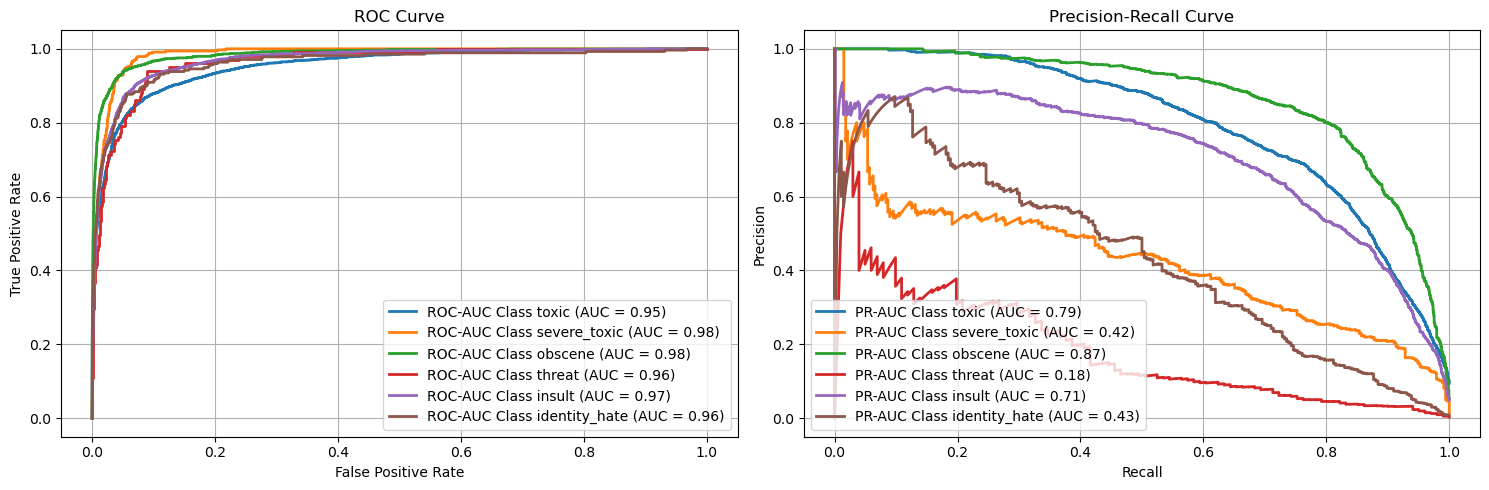

Computing the Decision Boundary to match the actual data distribution
Decision Boundary for Label toxic: 0.6275
Decision Boundary for Label severe_toxic: 0.4732
Decision Boundary for Label obscene: 0.3645
Decision Boundary for Label threat: 0.2504
Decision Boundary for Label insult: 0.3985
Decision Boundary for Label identity_hate: 0.3246


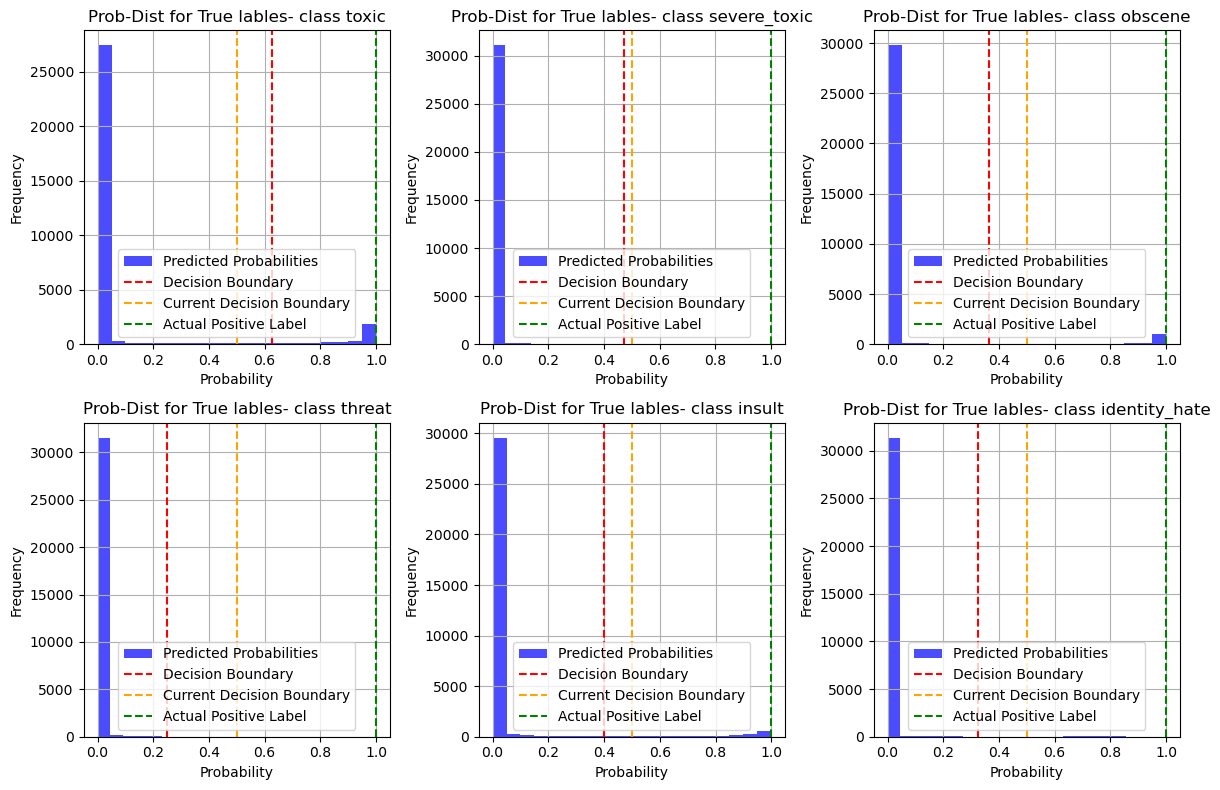

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 12.19it/s]


Average Accuracy: 97.825%


,Class,Precision,Recall,F1-score,Accuracy,ROC AUC
0,toxic,0.717305,0.717305,0.717305,0.946358,0.953703
1,severe_toxic,0.460815,0.438806,0.449541,0.988720,0.984641
2,obscene,0.800601,0.800601,0.800601,0.979195,0.984396
3,threat,0.301075,0.277228,0.288660,0.995676,0.964542
4,insult,0.679438,0.679004,0.679221,0.968510,0.969385
5,identity_hate,0.483271,0.471014,0.477064,0.991070,0.962186
6,average,0.573751,0.563993,0.568732,0.978255,0.969809


In [137]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score


def evaluate(model, loader, compute_decision=False):
    predicted = []
    actual = []
    flag = False
    with torch.no_grad():
        for inputs, labels in tqdm(loader):
            inputs = inputs.to(DEVICE)
            labels = labels.to(DEVICE)
            outputs = model(inputs)
            predicted.extend(outputs)
            actual.extend(labels)
            if flag:
                flag = False
                print(inputs)
                print(outputs)
                        
    predicted = [tensor.cpu().numpy() for tensor in predicted]
    actual = [tensor.cpu().numpy() for tensor in actual]
    print(len(predicted))
    
    plots(np.array(actual), np.array(predicted)) 
    
    # get_decision_boundary()
    thresholds = [0.5] * len(DETECTION_CLASSES)
    if compute_decision:
        print("Computing the Decision Boundary to match the actual data distribution")
        thresholds = get_decision_boundary(np.array(actual), np.array(predicted)) 
        
    predicted_classes = [[1 if val >= thresholds[j] else 0 for j, val in enumerate(output)] for output in predicted]
    
    precision, recall, f1, accuracy, roc_auc = [], [], [], [], []

    for i in tqdm(range(len(actual[0]))):
        precision.append(precision_score([row[i] for row in actual], [row[i] for row in predicted_classes]))
        recall.append(recall_score([row[i] for row in actual], [row[i] for row in predicted_classes]))
        f1.append(f1_score([row[i] for row in actual], [row[i] for row in predicted_classes]))
        accuracy.append(accuracy_score([row[i] for row in actual], [row[i] for row in predicted_classes]))
        roc_auc.append(roc_auc_score([row[i] for row in actual], [row[i] for row in predicted]))

    # Create a DataFrame to display the metrics
    metrics_df = pd.DataFrame({
        'Class':     [DETECTION_CLASSES[i] for i in list(range(len(actual[0])))] + ['average'],
        'Precision': precision + [np.mean(precision)],
        'Recall':    recall + [np.mean(recall)],
        'F1-score':  f1 + [np.mean(f1)],
        'Accuracy':  accuracy + [np.mean(accuracy)],
        'ROC AUC':   roc_auc + [np.mean(roc_auc)]
    })
    
    # Compute accuracy
    accuracies = []
    for pred, actual in zip(predicted_classes, actual):
        accuracy = np.sum(pred == actual)
        accuracies.append(accuracy)
    average_accuracy = np.sum(accuracies)/ (len(predicted_classes) * len(predicted_classes[0])) * 100.000
    print(f"Average Accuracy: {average_accuracy:.3f}%")

    return metrics_df, (predicted, actual)
    
    
metrics_df, preds = evaluate(model, val_loader, True)
metrics_df

test shape =  (63978, 8)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:14<00:00, 135.94it/s]


63978


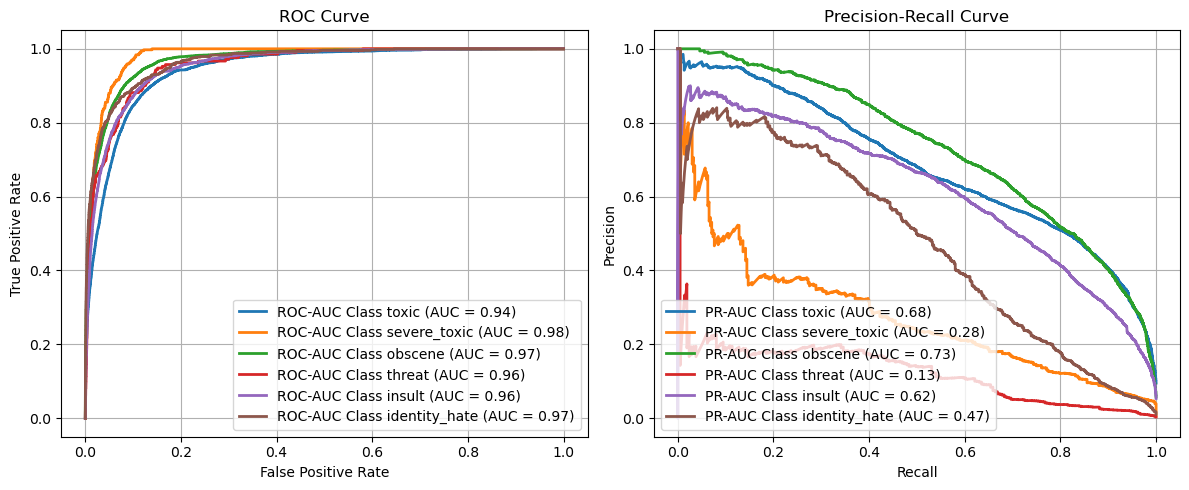

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.92it/s]


Average Accuracy: 96.51%
Filtered DF size = 4401
dj robinson gay hell suck dick
fuck anti semitic cunt
arrogant self serve immature idiot right
suck university nicknameless ncaa history happen
argh random idiot delete japan article
           Class  Precision    Recall  F1-score  Accuracy   ROC AUC
0          toxic   0.503992  0.808539  0.620933  0.906030  0.944447
1   severe_toxic   0.262321  0.449591  0.331325  0.989590  0.980094
2        obscene   0.590749  0.726632  0.651683  0.955188  0.968495
3         threat   0.168478  0.146919  0.156962  0.994795  0.957071
4         insult   0.570748  0.629705  0.598779  0.954797  0.955597
5  identity_hate   0.564148  0.450843  0.501171  0.990012  0.965797
6        average   0.443406  0.535372  0.476809  0.965069  0.961917


,comment_text,cleaned_text,actual_labels,predicted_label
24,DJ Robinson is gay as hell! he sucks his dick so much!!!!!,dj robinson gay hell suck dick,"toxic,obscene,insult,identity_hate","toxic,obscene"
29,":Fuck off, you anti-semitic cunt. |",fuck anti semitic cunt,"toxic,obscene,insult","toxic,severe_toxic,obscene,insult,identity_hate"
40,"::No, he is an arrogant, self serving, immature idiot. Get it right.",arrogant self serve immature idiot right,"toxic,obscene,insult","toxic,insult"
106,"::::Well, it sucks to have a university to be nicknameless. And it's the first time in NCAA history that it has happened. /",suck university nicknameless ncaa history happen,"toxic,obscene",obscene
107,== Argh == \n\n Some random idiot deleted the whole Japan article <.,argh random idiot delete japan article,"toxic,obscene,insult","toxic,obscene,insult"


In [122]:
def load_test_data():
    df1 = pd.read_csv(f'{base_path}/test.csv')
    df2 = pd.read_csv(f'{base_path}/test_labels.csv')
    df_test = pd.merge(df1, df2, on='id', how='inner')
    
    cols = df_test.columns[2:]
    df_test = df_test[(df_test[cols] != -1).all(axis=1)]
    df_test.reset_index(inplace=True)
    df_test = df_test.drop(columns=['index'])
    
    print("test shape = ", df_test.shape)
    return df_test



def get_labels(text, model):
    seq = processor.tokenize_string(text)
    predicted = model(torch.tensor(seq).to(DEVICE))
    predicted_classes = [[1 if val >= 0.5 else 0 for val in output] for output in predicted]
    return ",".join([DETECTION_CLASSES[i] for i, x in enumerate(predicted_classes[0]) if x == 1])



def show_sample_predicted_labels(df_test, model):
    filtered_df = df_test[(df_test.iloc[:, 2:].sum(axis=1) > 1)].copy()
    print(f"Filtered DF size = {len(filtered_df)}")

    # Concatenate labels into a single string using apply and lambda
    filtered_df['labels'] = filtered_df.apply(lambda row: ','.join(row.index[2:][row[2:] > 0]), axis=1)

    # Create new DataFrame with comment_text and labels
    selected_df = filtered_df[['comment_text', 'labels']].head(5)
    selected_df.rename(columns={'labels': 'actual_labels'}, inplace=True)
    pd.set_option('display.max_colwidth', None)
    selected_df['cleaned_text'] = selected_df['comment_text'].apply(clean_text)
    selected_df['predicted_label'] = selected_df['comment_text'].apply(lambda x: get_labels(x, model))
    return selected_df[['comment_text', 'cleaned_text', 'actual_labels', 'predicted_label']]
    

    
def evalue_model_on_test(model, compute_decision=False):
    df_test = load_test_data()

    X_test = processor.tokenize(df_test.copy())
    test_data_tensor = torch.tensor(X_test, dtype=torch.long)
    test_target_tensor = torch.tensor(df_test[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values, 
                                      dtype=torch.float)

    test_dataset = TensorDataset(test_data_tensor, test_target_tensor)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)
    
    metrics_df, preds = evaluate(model, test_loader, compute_decision)
    tagged_df = show_sample_predicted_labels(df_test, model)
    return metrics_df, tagged_df, preds
    
    
metrics_df, tagged_df, preds = evalue_model_on_test(model)
print(metrics_df)
tagged_df

# Full Data Model Training

Train Size = torch.Size([159570, 100]), Val Size = torch.Size([1, 100])
Started training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4987/4987 [04:35<00:00, 18.10it/s]


Epoch 1/10, Loss: 0.0611, Val Loss: 0.1865


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4987/4987 [04:33<00:00, 18.26it/s]


Epoch 2/10, Loss: 0.0425, Val Loss: 0.2125


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4987/4987 [04:25<00:00, 18.80it/s]


Epoch 3/10, Loss: 0.0358, Val Loss: 0.2564


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4987/4987 [04:17<00:00, 19.33it/s]


Epoch 4/10, Loss: 0.0309, Val Loss: 0.2605


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4987/4987 [04:13<00:00, 19.68it/s]


Epoch 5/10, Loss: 0.0268, Val Loss: 0.2924


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4987/4987 [04:06<00:00, 20.24it/s]


Epoch 6/10, Loss: 0.0234, Val Loss: 0.2831


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4987/4987 [04:01<00:00, 20.66it/s]


Epoch 7/10, Loss: 0.0203, Val Loss: 0.3562


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4987/4987 [03:59<00:00, 20.86it/s]


Epoch 8/10, Loss: 0.0177, Val Loss: 0.3464


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4987/4987 [03:56<00:00, 21.12it/s]


Epoch 9/10, Loss: 0.0155, Val Loss: 0.4766


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4987/4987 [03:56<00:00, 21.11it/s]


Epoch 10/10, Loss: 0.0140, Val Loss: 0.5089


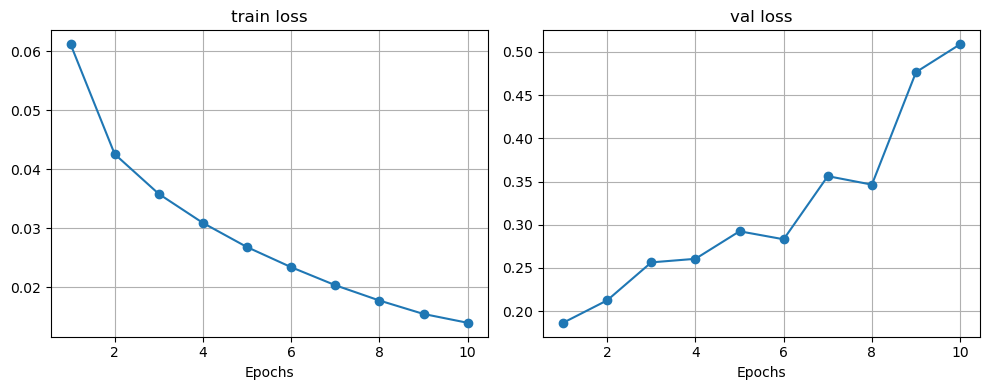

In [37]:
train_loader2, val_loader2 = get_train_test_data(X_t, train_df, 0.000005)
embedding_layer = processor.get_embedding_layer()
model2 = LSTMModel(embedding_layer, num_classes=6).to(DEVICE)


training_metrics2, model2 = train(train_loader2, test_loader, 
                                model2, criterion = nn.BCELoss(), 
                                optimizer = optim.Adam(model2.parameters()), 
                                num_epochs = 10)

test shape =  (63978, 8)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:15<00:00, 131.76it/s]


63978


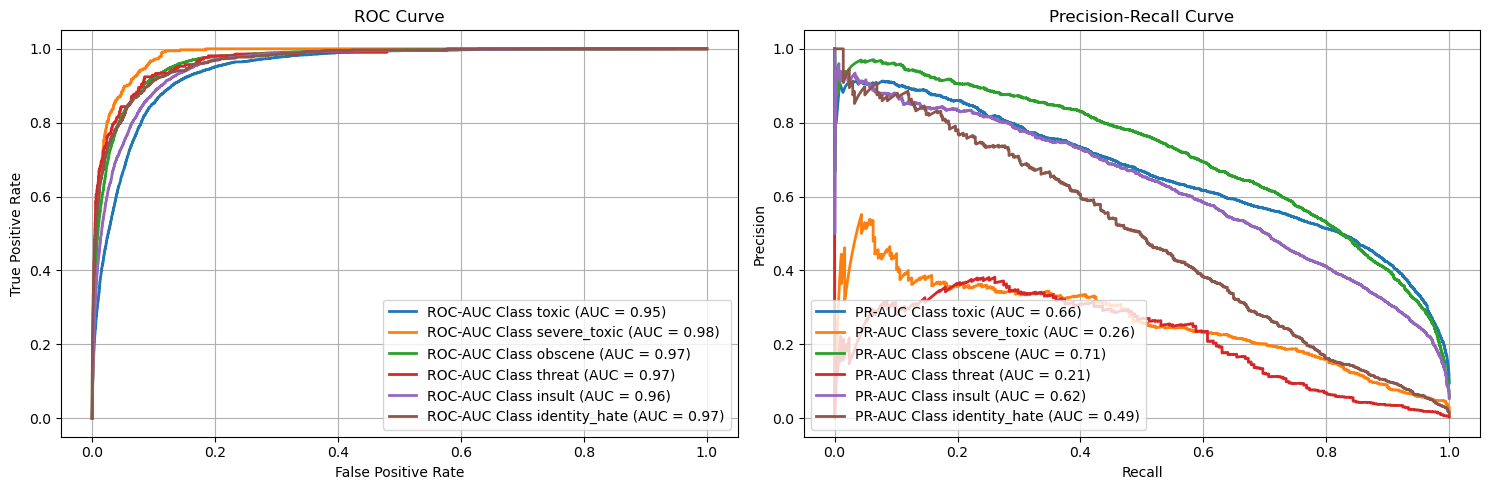

Computing the Decision Boundary to match the actual data distribution
Decision Boundary for Label toxic: 0.9416
Decision Boundary for Label severe_toxic: 0.6891
Decision Boundary for Label obscene: 0.7203
Decision Boundary for Label threat: 0.5326
Decision Boundary for Label insult: 0.5012
Decision Boundary for Label identity_hate: 0.3139


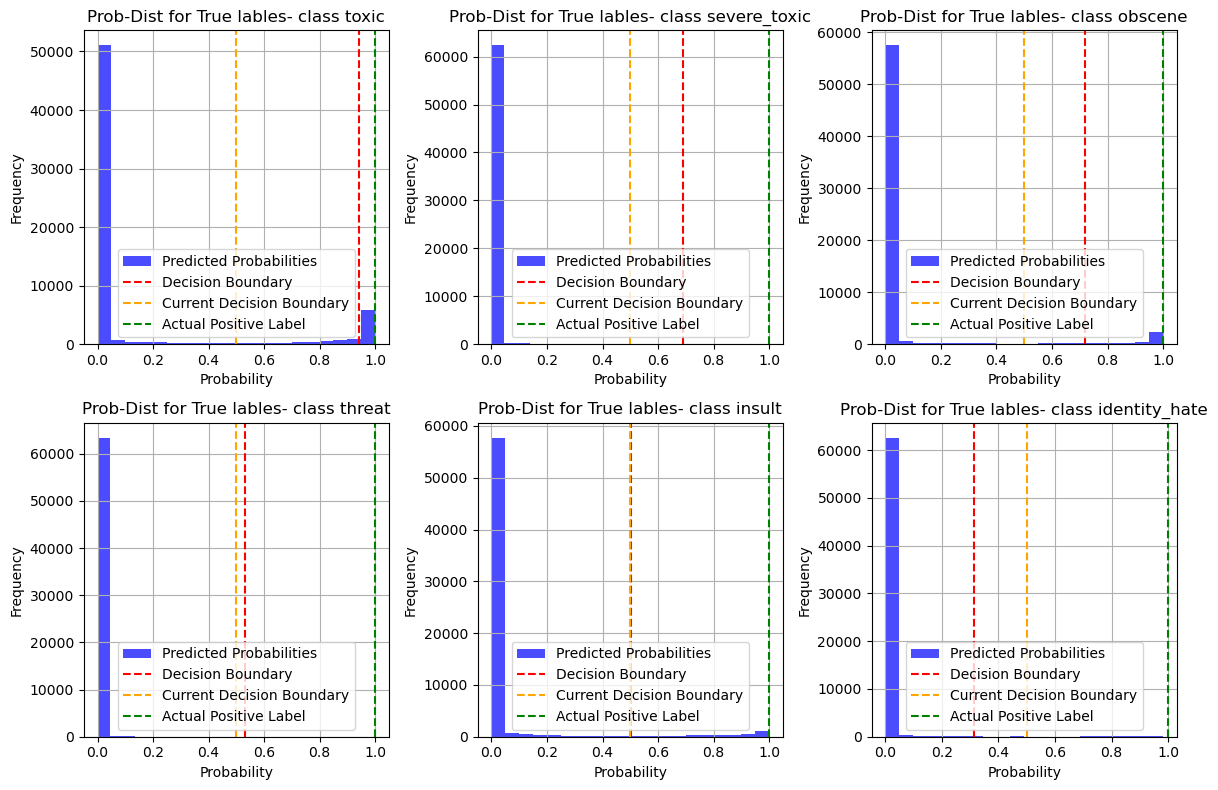

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.86it/s]


Average Accuracy: 96.993%
Filtered DF size = 4401
dj robinson gay hell suck dick
fuck anti semitic cunt
arrogant self serve immature idiot right
suck university nicknameless ncaa history happen
argh random idiot delete japan article
           Class  Precision    Recall  F1-score  Accuracy   ROC AUC
0          toxic   0.611987  0.611987  0.611987  0.926131  0.946860
1   severe_toxic   0.342193  0.280654  0.308383  0.992779  0.981473
2        obscene   0.652127  0.652127  0.652127  0.959861  0.968663
3         threat   0.340314  0.308057  0.323383  0.995749  0.971229
4         insult   0.590776  0.590604  0.590690  0.956157  0.958512
5  identity_hate   0.502849  0.495787  0.499293  0.988934  0.968277
6        average   0.506708  0.489869  0.497644  0.969935  0.965836


,comment_text,cleaned_text,actual_labels,predicted_label
24,DJ Robinson is gay as hell! he sucks his dick so much!!!!!,dj robinson gay hell suck dick,"toxic,obscene,insult,identity_hate","toxic,obscene,insult"
29,":Fuck off, you anti-semitic cunt. |",fuck anti semitic cunt,"toxic,obscene,insult","toxic,obscene,insult,identity_hate"
40,"::No, he is an arrogant, self serving, immature idiot. Get it right.",arrogant self serve immature idiot right,"toxic,obscene,insult",toxic
106,"::::Well, it sucks to have a university to be nicknameless. And it's the first time in NCAA history that it has happened. /",suck university nicknameless ncaa history happen,"toxic,obscene",
107,== Argh == \n\n Some random idiot deleted the whole Japan article <.,argh random idiot delete japan article,"toxic,obscene,insult","toxic,obscene,insult"


In [139]:
metrics_df2, tagged_df2, preds2 = evalue_model_on_test(model2, True)
print(metrics_df2)
tagged_df2

# New  Model  Training with Deeper and Wider LSTM Model

LSTMModel2(
  (embedding_layer): Embedding(149352, 300)
  (lstm): LSTM(300, 160, batch_first=True)
  (global_max_pooling): AdaptiveMaxPool1d(output_size=1)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dense1): Linear(in_features=160, out_features=80, bias=True)
  (relu): ReLU()
  (dropout2): Dropout(p=0.1, inplace=False)
  (dense2): Linear(in_features=80, out_features=40, bias=True)
  (dropout3): Dropout(p=0.1, inplace=False)
  (dense3): Linear(in_features=40, out_features=6, bias=True)
  (sigmoid): Sigmoid()
)
Started training


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4987/4987 [05:03<00:00, 16.45it/s]


Epoch 1/10, Loss: 0.0569, Val Loss: 0.2081


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4987/4987 [04:59<00:00, 16.67it/s]


Epoch 2/10, Loss: 0.0421, Val Loss: 0.1903


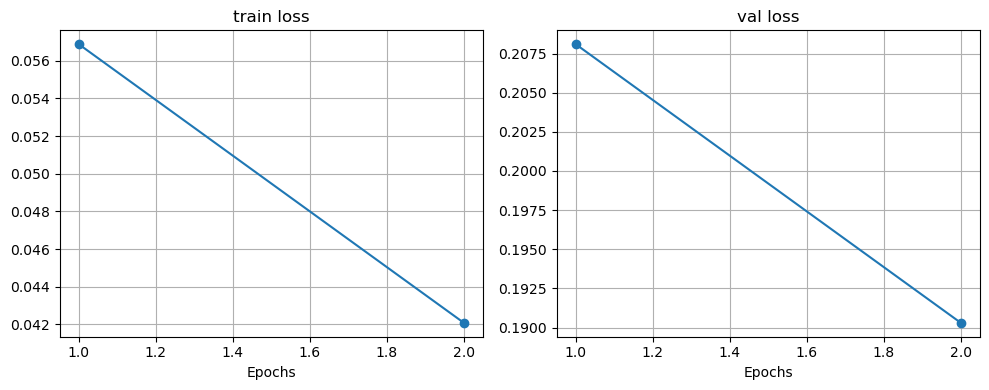

test shape =  (63978, 8)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:22<00:00, 90.13it/s]


63978


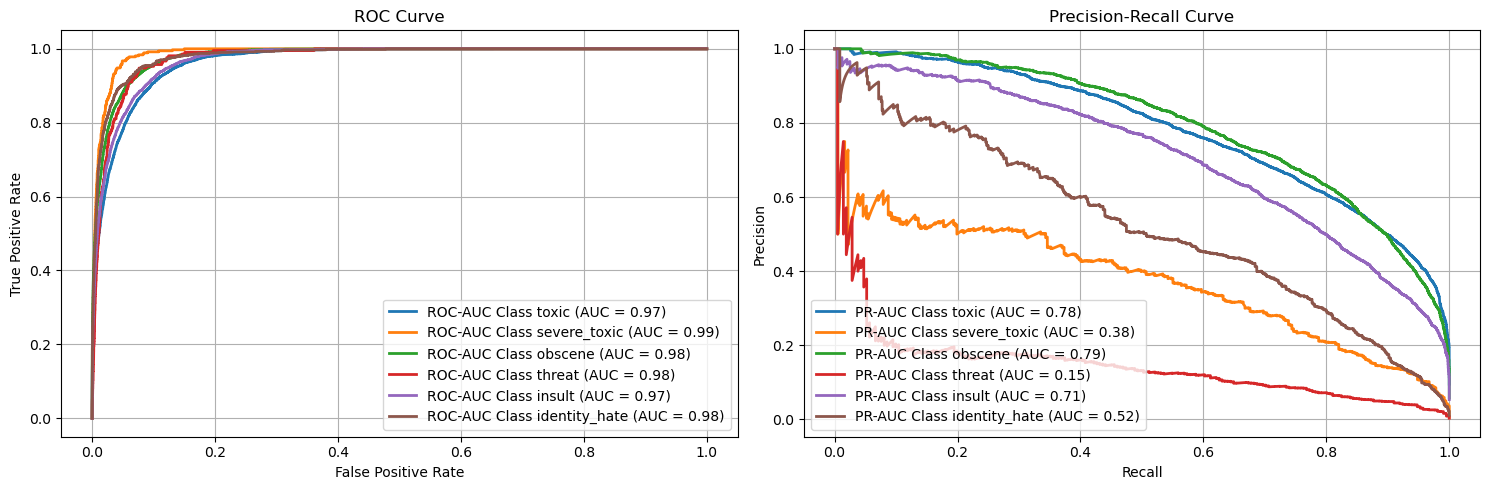

Computing the Decision Boundary to match the actual data distribution
Decision Boundary for Label toxic: 0.7049
Decision Boundary for Label severe_toxic: 0.6329
Decision Boundary for Label obscene: 0.6587
Decision Boundary for Label threat: 0.7268
Decision Boundary for Label insult: 0.5722
Decision Boundary for Label identity_hate: 0.5922


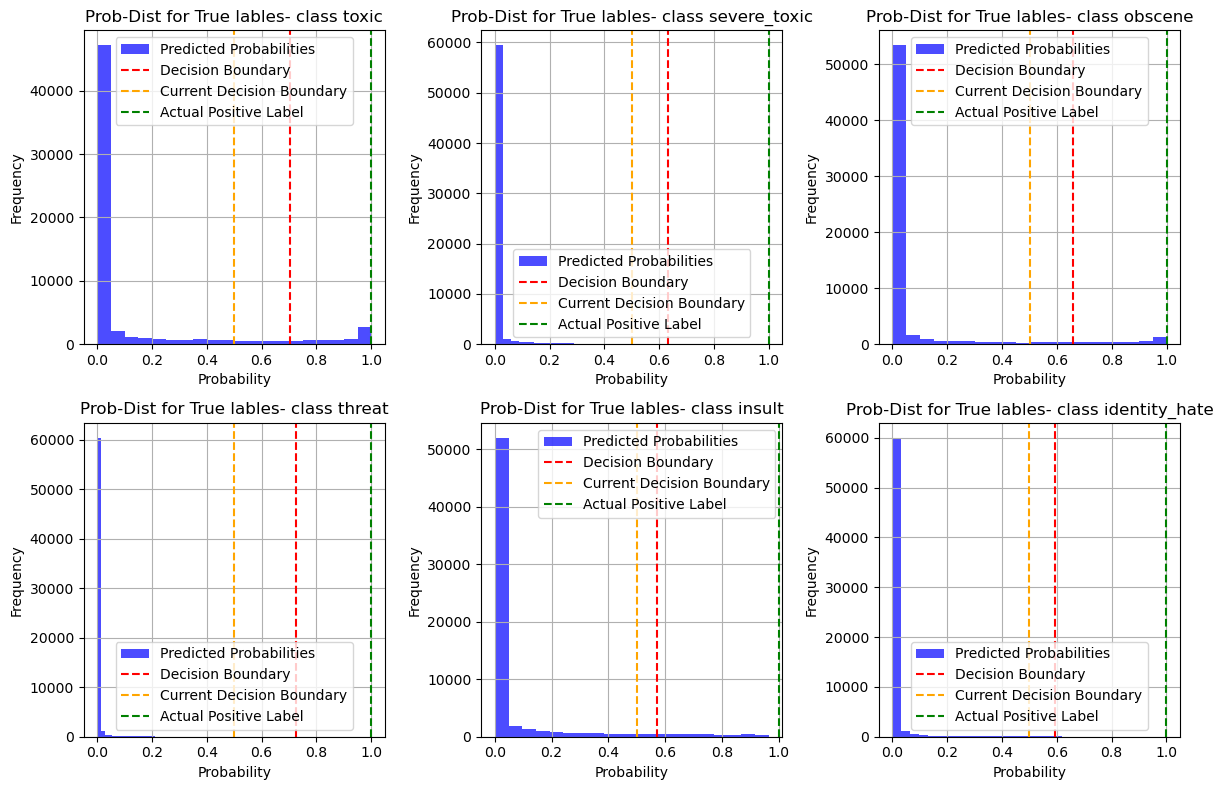

 17%|███████████████████████▋                                                                                                                      | 1/6 [00:00<00:00,  5.74it/s]/Users/hims/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 50%|███████████████████████████████████████████████████████████████████████                                                                       | 3/6 [00:00<00:00,  5.96it/s]/Users/hims/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|███████

Average Accuracy: 97.528%
Filtered DF size = 4401
dj robinson gay hell suck dick
fuck anti semitic cunt
arrogant self serve immature idiot right
suck university nicknameless ncaa history happen
argh random idiot delete japan article
           Class  Precision    Recall  F1-score  Accuracy   ROC AUC
0          toxic   0.693596  0.693596  0.693596  0.941667  0.967006
1   severe_toxic   0.000000  0.000000  0.000000  0.994264  0.988711
2        obscene   0.711533  0.710377  0.710954  0.966676  0.980112
3         threat   0.000000  0.000000  0.000000  0.996702  0.976202
4         insult   0.661236  0.627663  0.644012  0.962831  0.971437
5  identity_hate   0.866667  0.073034  0.134715  0.989559  0.981290
6        average   0.488839  0.350778  0.363880  0.975283  0.977460


,comment_text,cleaned_text,actual_labels,predicted_label
24,DJ Robinson is gay as hell! he sucks his dick so much!!!!!,dj robinson gay hell suck dick,"toxic,obscene,insult,identity_hate","toxic,obscene,insult"
29,":Fuck off, you anti-semitic cunt. |",fuck anti semitic cunt,"toxic,obscene,insult","toxic,obscene,insult"
40,"::No, he is an arrogant, self serving, immature idiot. Get it right.",arrogant self serve immature idiot right,"toxic,obscene,insult","toxic,insult"
106,"::::Well, it sucks to have a university to be nicknameless. And it's the first time in NCAA history that it has happened. /",suck university nicknameless ncaa history happen,"toxic,obscene","toxic,obscene"
107,== Argh == \n\n Some random idiot deleted the whole Japan article <.,argh random idiot delete japan article,"toxic,obscene,insult","toxic,obscene,insult"


In [140]:
class LSTMModel2(nn.Module):
    
    def __init__(self, embedding_layer, num_classes, hidden_size=160, dropout=0.1):
        super(LSTMModel2, self).__init__()
        self.embedding_layer = embedding_layer
        self.lstm = nn.LSTM(embedding_layer.embedding_dim, hidden_size, batch_first=True)
        self.global_max_pooling = nn.AdaptiveMaxPool1d(1)
        self.dropout1 = nn.Dropout(dropout)
        self.dense1 = nn.Linear(hidden_size, hidden_size//2)
        self.relu = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)
        self.dense2 = nn.Linear(hidden_size//2, hidden_size//4)
        self.dropout3 = nn.Dropout(dropout)
        self.dense3 = nn.Linear(hidden_size//4, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded_sequences = self.embedding_layer(x)
        lstm_output, _ = self.lstm(embedded_sequences)
        global_max_pooled = self.global_max_pooling(lstm_output.permute(0, 2, 1))
        x = self.dropout1(global_max_pooled.squeeze(2))
        x = self.relu(self.dense1(x))
        x = self.dropout2(x)
        # x = self.dense2(x)
        
        x = self.relu(self.dense2(x))
        x = self.dropout3(x)
        x = self.dense3(x)
        
        return self.sigmoid(x)

embedding_layer = processor.get_embedding_layer()
model3 = LSTMModel2(embedding_layer, num_classes=6).to(DEVICE)
print(model3)
training_metrics3, model3 = train(train_loader2, test_loader, 
                                    model3, criterion = nn.BCELoss(), 
                                    optimizer = optim.Adam(model3.parameters(), lr=0.001, betas=(0.9, 0.999)), 
                                    num_epochs = 2)

metrics_df3, tagged_df3, preds3 = evalue_model_on_test(model3, True)
print(metrics_df3)
tagged_df3